In [1]:
import numpy as np
import pandas as pd
import xarray
import matplotlib.pyplot as plt

In [2]:
garea = xarray.open_dataset("D:/kerja/asisten riset/vol/milkunarc/cadlan/Analysis1_slidingwindows/GAREA.NC", engine="netcdf4")
garea_ha = np.nan_to_num(np.multiply(garea['GAREA'].isel(time=slice(0, 5)), 100))

In [3]:
# Step 2b: Konversi unit selisih GBIOMASS dari Mg C/ km2 ke selected unit (ton C/ha)
#unit of gbiomass selisih (carbon density) adalah Mg C/ km2
#1 Mg = 1000 kg
#1000kg / 1 Mg = 1000

Mg_to_kg = 1e3

#1 Mg = 1 ton

Mg_to_tonne = 1

#1 km2 = 100 ha

km2_to_ha = 1e2

kg_to_tonne = 1e-3

#Example conversion unit: 20.000 Mg C/km2 x (1 tonne/ 1 Mg)  / (100 ha/ 1km2) --> result in ton C/ha
# gbiomass_tonCha = gbiomas_selisih['gbiomass_manip_selisih'] * Mg_to_tonne / km2_to_ha

#density to total per grid (tonC/ha * ha) --> result tonC
# emission_C_ton = np.nan_to_num(np.multiply(gbiomass_tonCha, garea_ha))

# Step 2c: Konversi ton C ke ton CO2
#molar mass of CO2 = 44 g/ mol
#molar mass of C = 12 g/ mol
#conversion rate = 44/12
#1 million ton = 1.000.000 ton
#ton_to_millionton = 1e-6
ton_to_gigaton = 1e-9

# emission_GtTon_CO2 = emission_C_ton * (44/12) * ton_to_gigaton

In [4]:
data1 = xarray.open_dataset("D:/kerja/asisten riset/vol/milkunC/achaidir/nco2/GECH4AW.NC", engine="netcdf4")
data2 = xarray.open_dataset("D:/kerja/asisten riset/vol/milkunC/achaidir/nco2/GECH4DF.NC", engine="netcdf4")
data3 = xarray.open_dataset("D:/kerja/asisten riset/vol/milkunC/achaidir/nco2/GECH4RI.NC", engine="netcdf4") # belakang
data4 = xarray.open_dataset("D:/kerja/asisten riset/vol/milkunC/achaidir/nco2/GECH4SB.NC", engine="netcdf4")
data5 = xarray.open_dataset("D:/kerja/asisten riset/vol/milkunC/achaidir/nco2/GECO2AB.NC", engine="netcdf4")
data6 = xarray.open_dataset("D:/kerja/asisten riset/vol/milkunC/achaidir/nco2/GECO2DF.NC", engine="netcdf4")
data7 = xarray.open_dataset("D:/kerja/asisten riset/vol/milkunC/achaidir/nco2/GEN2ODF.NC", engine="netcdf4")
data8 = xarray.open_dataset("D:/kerja/asisten riset/vol/milkunC/achaidir/nco2/GEN2OFE.NC", engine="netcdf4")
data9 = xarray.open_dataset("D:/kerja/asisten riset/vol/milkunC/achaidir/nco2/GEN2OIF.NC", engine="netcdf4")
data10 = xarray.open_dataset("D:/kerja/asisten riset/vol/milkunC/achaidir/nco2/GEN2OLC.NC", engine="netcdf4")
data11 = xarray.open_dataset("D:/kerja/asisten riset/vol/milkunC/achaidir/nco2/GEN2ORE.NC", engine="netcdf4")
data12 = xarray.open_dataset("D:/kerja/asisten riset/vol/milkunC/achaidir/nco2/GEN2OSB.NC", engine="netcdf4")

In [25]:
GECH4AW = ((data1['GECH4AW'].isel(time=slice(0, 5)) * kg_to_tonne / km2_to_ha) * garea_ha) * ton_to_gigaton * 25
GECH4DF = ((data2['GECH4DF'].isel(time=slice(0, 5)) * kg_to_tonne / km2_to_ha) * garea_ha) * ton_to_gigaton * 25
GECH4RI = ((data3['GECH4RI'].isel(time=slice(0, 5)) * kg_to_tonne / km2_to_ha) * garea_ha) * ton_to_gigaton * 25
GECH4SB = ((data4['GECH4SB'].isel(time=slice(0, 5)) * kg_to_tonne / km2_to_ha) * garea_ha) * ton_to_gigaton * 25
GECO2AB = ((data5['GECO2AB'].isel(time=slice(0, 5)) * Mg_to_tonne / km2_to_ha) * garea_ha) * ton_to_gigaton #mg to ton
GECO2DF = ((data6['GECO2DF'].isel(time=slice(0, 5)) * Mg_to_tonne / km2_to_ha) * garea_ha) * ton_to_gigaton #mg to ton
GEN2ODF = ((data7['GEN2ODF'].isel(time=slice(0, 5)) * kg_to_tonne / km2_to_ha) * garea_ha) * ton_to_gigaton * 298
GEN2OFE = ((data8['GEN2OFE'].isel(time=slice(0, 5)) * kg_to_tonne / km2_to_ha) * garea_ha) * ton_to_gigaton * 298
GEN2OIF = ((data9['GEN2OIF'].isel(time=slice(0, 5)) * kg_to_tonne / km2_to_ha) * garea_ha) * ton_to_gigaton * 298
GEN2OLC = ((data10['GEN2OLC'].isel(time=slice(0, 5)) * kg_to_tonne / km2_to_ha) * garea_ha) * ton_to_gigaton * 298
GEN2ORE = ((data11['GEN2ORE'].isel(time=slice(0, 5)) * kg_to_tonne / km2_to_ha) * garea_ha) * ton_to_gigaton * 298
GEN2OSB = ((data12['GEN2OSB'].isel(time=slice(0, 5)) * kg_to_tonne / km2_to_ha) * garea_ha) * ton_to_gigaton * 298

In [26]:
GECH4AW0 = GECH4AW.isel(time=0).to_dataframe()
GECH4AW1 = GECH4AW.isel(time=1).to_dataframe()
GECH4AW2 = GECH4AW.isel(time=2).to_dataframe()
GECH4AW3 = GECH4AW.isel(time=3).to_dataframe()
GECH4AW4 = GECH4AW.isel(time=4).to_dataframe()
GECH4AW5 = GECH4AW.isel(time=5).to_dataframe()
GECH4AW6 = GECH4AW.isel(time=6).to_dataframe()
GECH4AW7 = GECH4AW.isel(time=7).to_dataframe()
GECH4AW8 = GECH4AW.isel(time=8).to_dataframe()
GECH4AW9 = GECH4AW.isel(time=9).to_dataframe()
GECH4AW10 = GECH4AW.isel(time=10).to_dataframe()

GECH4DF0 = GECH4DF.isel(time=0).to_dataframe()
GECH4DF1 = GECH4DF.isel(time=1).to_dataframe()
GECH4DF2 = GECH4DF.isel(time=2).to_dataframe()
GECH4DF3 = GECH4DF.isel(time=3).to_dataframe()
GECH4DF4 = GECH4DF.isel(time=4).to_dataframe()
GECH4DF5 = GECH4DF.isel(time=5).to_dataframe()
GECH4DF6 = GECH4DF.isel(time=6).to_dataframe()
GECH4DF7 = GECH4DF.isel(time=7).to_dataframe()
GECH4DF8 = GECH4DF.isel(time=8).to_dataframe()
GECH4DF9 = GECH4DF.isel(time=9).to_dataframe()
GECH4DF10 = GECH4DF.isel(time=10).to_dataframe()

GECH4RI0 = GECH4RI.isel(time=0).to_dataframe()
GECH4RI1 = GECH4RI.isel(time=1).to_dataframe()
GECH4RI2 = GECH4RI.isel(time=2).to_dataframe()
GECH4RI3 = GECH4RI.isel(time=3).to_dataframe()
GECH4RI4 = GECH4RI.isel(time=4).to_dataframe()
GECH4RI5 = GECH4RI.isel(time=5).to_dataframe()
GECH4RI6 = GECH4RI.isel(time=6).to_dataframe()
GECH4RI7 = GECH4RI.isel(time=7).to_dataframe()
GECH4RI8 = GECH4RI.isel(time=8).to_dataframe()
GECH4RI9 = GECH4RI.isel(time=9).to_dataframe()
GECH4RI10 = GECH4RI.isel(time=10).to_dataframe()

GECH4SB0 = GECH4SB.isel(time=0).to_dataframe()
GECH4SB1 = GECH4SB.isel(time=1).to_dataframe()
GECH4SB2 = GECH4SB.isel(time=2).to_dataframe()
GECH4SB3 = GECH4SB.isel(time=3).to_dataframe()
GECH4SB4 = GECH4SB.isel(time=4).to_dataframe()
GECH4SB5 = GECH4SB.isel(time=5).to_dataframe()
GECH4SB6 = GECH4SB.isel(time=6).to_dataframe()
GECH4SB7 = GECH4SB.isel(time=7).to_dataframe()
GECH4SB8 = GECH4SB.isel(time=8).to_dataframe()
GECH4SB9 = GECH4SB.isel(time=9).to_dataframe()
GECH4SB10 = GECH4SB.isel(time=10).to_dataframe()

GECO2AB0 = GECO2AB.isel(time=0).to_dataframe()
GECO2AB1 = GECO2AB.isel(time=1).to_dataframe()
GECO2AB2 = GECO2AB.isel(time=2).to_dataframe()
GECO2AB3 = GECO2AB.isel(time=3).to_dataframe()
GECO2AB4 = GECO2AB.isel(time=4).to_dataframe()
GECO2AB5 = GECO2AB.isel(time=5).to_dataframe()
GECO2AB6 = GECO2AB.isel(time=6).to_dataframe()
GECO2AB7 = GECO2AB.isel(time=7).to_dataframe()
GECO2AB8 = GECO2AB.isel(time=8).to_dataframe()
GECO2AB9 = GECO2AB.isel(time=9).to_dataframe()
GECO2AB10 = GECO2AB.isel(time=10).to_dataframe()

GECO2DF0 = GECO2DF.isel(time=0).to_dataframe()
GECO2DF1 = GECO2DF.isel(time=1).to_dataframe()
GECO2DF2 = GECO2DF.isel(time=2).to_dataframe()
GECO2DF3 = GECO2DF.isel(time=3).to_dataframe()
GECO2DF4 = GECO2DF.isel(time=4).to_dataframe()
GECO2DF5 = GECO2DF.isel(time=5).to_dataframe()
GECO2DF6 = GECO2DF.isel(time=6).to_dataframe()
GECO2DF7 = GECO2DF.isel(time=7).to_dataframe()
GECO2DF8 = GECO2DF.isel(time=8).to_dataframe()
GECO2DF9 = GECO2DF.isel(time=9).to_dataframe()
GECO2DF10 = GECO2DF.isel(time=10).to_dataframe()

GEN2ODF0 = GEN2ODF.isel(time=0).to_dataframe()
GEN2ODF1 = GEN2ODF.isel(time=1).to_dataframe()
GEN2ODF2 = GEN2ODF.isel(time=2).to_dataframe()
GEN2ODF3 = GEN2ODF.isel(time=3).to_dataframe()
GEN2ODF4 = GEN2ODF.isel(time=4).to_dataframe()
GEN2ODF5 = GEN2ODF.isel(time=5).to_dataframe()
GEN2ODF6 = GEN2ODF.isel(time=6).to_dataframe()
GEN2ODF7 = GEN2ODF.isel(time=7).to_dataframe()
GEN2ODF8 = GEN2ODF.isel(time=8).to_dataframe()
GEN2ODF9 = GEN2ODF.isel(time=9).to_dataframe()
GEN2ODF10 = GEN2ODF.isel(time=10).to_dataframe()

GEN2OFE0 = GEN2OFE.isel(time=0).to_dataframe()
GEN2OFE1 = GEN2OFE.isel(time=1).to_dataframe()
GEN2OFE2 = GEN2OFE.isel(time=2).to_dataframe()
GEN2OFE3 = GEN2OFE.isel(time=3).to_dataframe()
GEN2OFE4 = GEN2OFE.isel(time=4).to_dataframe()
GEN2OFE5 = GEN2OFE.isel(time=5).to_dataframe()
GEN2OFE6 = GEN2OFE.isel(time=6).to_dataframe()
GEN2OFE7 = GEN2OFE.isel(time=7).to_dataframe()
GEN2OFE8 = GEN2OFE.isel(time=8).to_dataframe()
GEN2OFE9 = GEN2OFE.isel(time=9).to_dataframe()
GEN2OFE10 = GEN2OFE.isel(time=10).to_dataframe()

GEN2OIF0 = GEN2OIF.isel(time=0).to_dataframe()
GEN2OIF1 = GEN2OIF.isel(time=1).to_dataframe()
GEN2OIF2 = GEN2OIF.isel(time=2).to_dataframe()
GEN2OIF3 = GEN2OIF.isel(time=3).to_dataframe()
GEN2OIF4 = GEN2OIF.isel(time=4).to_dataframe()
GEN2OIF5 = GEN2OIF.isel(time=5).to_dataframe()
GEN2OIF6 = GEN2OIF.isel(time=6).to_dataframe()
GEN2OIF7 = GEN2OIF.isel(time=7).to_dataframe()
GEN2OIF8 = GEN2OIF.isel(time=8).to_dataframe()
GEN2OIF9 = GEN2OIF.isel(time=9).to_dataframe()
GEN2OIF10 = GEN2OIF.isel(time=10).to_dataframe()

GEN2OLC0 = GEN2OLC.isel(time=0).to_dataframe()
GEN2OLC1 = GEN2OLC.isel(time=1).to_dataframe()
GEN2OLC2 = GEN2OLC.isel(time=2).to_dataframe()
GEN2OLC3 = GEN2OLC.isel(time=3).to_dataframe()
GEN2OLC4 = GEN2OLC.isel(time=4).to_dataframe()
GEN2OLC5 = GEN2OLC.isel(time=5).to_dataframe()
GEN2OLC6 = GEN2OLC.isel(time=6).to_dataframe()
GEN2OLC7 = GEN2OLC.isel(time=7).to_dataframe()
GEN2OLC8 = GEN2OLC.isel(time=8).to_dataframe()
GEN2OLC9 = GEN2OLC.isel(time=9).to_dataframe()
GEN2OLC10 = GEN2OLC.isel(time=10).to_dataframe()

GEN2ORE0 = GEN2ORE.isel(time=0).to_dataframe()
GEN2ORE1 = GEN2ORE.isel(time=1).to_dataframe()
GEN2ORE2 = GEN2ORE.isel(time=2).to_dataframe()
GEN2ORE3 = GEN2ORE.isel(time=3).to_dataframe()
GEN2ORE4 = GEN2ORE.isel(time=4).to_dataframe()
GEN2ORE5 = GEN2ORE.isel(time=5).to_dataframe()
GEN2ORE6 = GEN2ORE.isel(time=6).to_dataframe()
GEN2ORE7 = GEN2ORE.isel(time=7).to_dataframe()
GEN2ORE8 = GEN2ORE.isel(time=8).to_dataframe()
GEN2ORE9 = GEN2ORE.isel(time=9).to_dataframe()
GEN2ORE10 = GEN2ORE.isel(time=10).to_dataframe()

GEN2OSB0 = GEN2OSB.isel(time=0).to_dataframe()
GEN2OSB1 = GEN2OSB.isel(time=1).to_dataframe()
GEN2OSB2 = GEN2OSB.isel(time=2).to_dataframe()
GEN2OSB3 = GEN2OSB.isel(time=3).to_dataframe()
GEN2OSB4 = GEN2OSB.isel(time=4).to_dataframe()
GEN2OSB5 = GEN2OSB.isel(time=5).to_dataframe()
GEN2OSB6 = GEN2OSB.isel(time=6).to_dataframe()
GEN2OSB7 = GEN2OSB.isel(time=7).to_dataframe()
GEN2OSB8 = GEN2OSB.isel(time=8).to_dataframe()
GEN2OSB9 = GEN2OSB.isel(time=9).to_dataframe()
GEN2OSB10 = GEN2OSB.isel(time=10).to_dataframe()

In [27]:
GECH4AW0_pt = pd.pivot_table(GECH4AW0, values=['GECH4AW'], columns=['time'], fill_value=0, aggfunc='sum')
GECH4AW1_pt = pd.pivot_table(GECH4AW1, values=['GECH4AW'], columns=['time'], fill_value=0, aggfunc='sum')
GECH4AW2_pt = pd.pivot_table(GECH4AW2, values=['GECH4AW'], columns=['time'], fill_value=0, aggfunc='sum')
GECH4AW3_pt = pd.pivot_table(GECH4AW3, values=['GECH4AW'], columns=['time'], fill_value=0, aggfunc='sum')
GECH4AW4_pt = pd.pivot_table(GECH4AW4, values=['GECH4AW'], columns=['time'], fill_value=0, aggfunc='sum')
GECH4AW5_pt = pd.pivot_table(GECH4AW5, values=['GECH4AW'], columns=['time'], fill_value=0, aggfunc='sum')
GECH4AW6_pt = pd.pivot_table(GECH4AW6, values=['GECH4AW'], columns=['time'], fill_value=0, aggfunc='sum')
GECH4AW7_pt = pd.pivot_table(GECH4AW7, values=['GECH4AW'], columns=['time'], fill_value=0, aggfunc='sum')
GECH4AW8_pt = pd.pivot_table(GECH4AW8, values=['GECH4AW'], columns=['time'], fill_value=0, aggfunc='sum')
GECH4AW9_pt = pd.pivot_table(GECH4AW9, values=['GECH4AW'], columns=['time'], fill_value=0, aggfunc='sum')
GECH4AW10_pt = pd.pivot_table(GECH4AW10, values=['GECH4AW'], columns=['time'], fill_value=0, aggfunc='sum')

GECH4DF0_pt = pd.pivot_table(GECH4DF0, values=['GECH4DF'], columns=['time'], fill_value=0, aggfunc='sum')
GECH4DF1_pt = pd.pivot_table(GECH4DF1, values=['GECH4DF'], columns=['time'], fill_value=0, aggfunc='sum')
GECH4DF2_pt = pd.pivot_table(GECH4DF2, values=['GECH4DF'], columns=['time'], fill_value=0, aggfunc='sum')
GECH4DF3_pt = pd.pivot_table(GECH4DF3, values=['GECH4DF'], columns=['time'], fill_value=0, aggfunc='sum')
GECH4DF4_pt = pd.pivot_table(GECH4DF4, values=['GECH4DF'], columns=['time'], fill_value=0, aggfunc='sum')
GECH4DF5_pt = pd.pivot_table(GECH4DF5, values=['GECH4DF'], columns=['time'], fill_value=0, aggfunc='sum')
GECH4DF6_pt = pd.pivot_table(GECH4DF6, values=['GECH4DF'], columns=['time'], fill_value=0, aggfunc='sum')
GECH4DF7_pt = pd.pivot_table(GECH4DF7, values=['GECH4DF'], columns=['time'], fill_value=0, aggfunc='sum')
GECH4DF8_pt = pd.pivot_table(GECH4DF8, values=['GECH4DF'], columns=['time'], fill_value=0, aggfunc='sum')
GECH4DF9_pt = pd.pivot_table(GECH4DF9, values=['GECH4DF'], columns=['time'], fill_value=0, aggfunc='sum')
GECH4DF10_pt = pd.pivot_table(GECH4DF10, values=['GECH4DF'], columns=['time'], fill_value=0, aggfunc='sum')

GECH4RI0_pt = pd.pivot_table(GECH4RI0, values=['GECH4RI'], columns=['time'], fill_value=0, aggfunc='sum')
GECH4RI1_pt = pd.pivot_table(GECH4RI1, values=['GECH4RI'], columns=['time'], fill_value=0, aggfunc='sum')
GECH4RI2_pt = pd.pivot_table(GECH4RI2, values=['GECH4RI'], columns=['time'], fill_value=0, aggfunc='sum')
GECH4RI3_pt = pd.pivot_table(GECH4RI3, values=['GECH4RI'], columns=['time'], fill_value=0, aggfunc='sum')
GECH4RI4_pt = pd.pivot_table(GECH4RI4, values=['GECH4RI'], columns=['time'], fill_value=0, aggfunc='sum')
GECH4RI5_pt = pd.pivot_table(GECH4RI5, values=['GECH4RI'], columns=['time'], fill_value=0, aggfunc='sum')
GECH4RI6_pt = pd.pivot_table(GECH4RI6, values=['GECH4RI'], columns=['time'], fill_value=0, aggfunc='sum')
GECH4RI7_pt = pd.pivot_table(GECH4RI7, values=['GECH4RI'], columns=['time'], fill_value=0, aggfunc='sum')
GECH4RI8_pt = pd.pivot_table(GECH4RI8, values=['GECH4RI'], columns=['time'], fill_value=0, aggfunc='sum')
GECH4RI9_pt = pd.pivot_table(GECH4RI9, values=['GECH4RI'], columns=['time'], fill_value=0, aggfunc='sum')
GECH4RI10_pt = pd.pivot_table(GECH4RI10, values=['GECH4RI'], columns=['time'], fill_value=0, aggfunc='sum')

GECH4SB0_pt = pd.pivot_table(GECH4SB0, values=['GECH4SB'], columns=['time'], fill_value=0, aggfunc='sum')
GECH4SB1_pt = pd.pivot_table(GECH4SB1, values=['GECH4SB'], columns=['time'], fill_value=0, aggfunc='sum')
GECH4SB2_pt = pd.pivot_table(GECH4SB2, values=['GECH4SB'], columns=['time'], fill_value=0, aggfunc='sum')
GECH4SB3_pt = pd.pivot_table(GECH4SB3, values=['GECH4SB'], columns=['time'], fill_value=0, aggfunc='sum')
GECH4SB4_pt = pd.pivot_table(GECH4SB4, values=['GECH4SB'], columns=['time'], fill_value=0, aggfunc='sum')
GECH4SB5_pt = pd.pivot_table(GECH4SB5, values=['GECH4SB'], columns=['time'], fill_value=0, aggfunc='sum')
GECH4SB6_pt = pd.pivot_table(GECH4SB6, values=['GECH4SB'], columns=['time'], fill_value=0, aggfunc='sum')
GECH4SB7_pt = pd.pivot_table(GECH4SB7, values=['GECH4SB'], columns=['time'], fill_value=0, aggfunc='sum')
GECH4SB8_pt = pd.pivot_table(GECH4SB8, values=['GECH4SB'], columns=['time'], fill_value=0, aggfunc='sum')
GECH4SB9_pt = pd.pivot_table(GECH4SB9, values=['GECH4SB'], columns=['time'], fill_value=0, aggfunc='sum')
GECH4SB10_pt = pd.pivot_table(GECH4SB10, values=['GECH4SB'], columns=['time'], fill_value=0, aggfunc='sum')

GECO2AB0_pt = pd.pivot_table(GECO2AB0, values=['GECO2AB'], columns=['time'], fill_value=0, aggfunc='sum')
GECO2AB1_pt = pd.pivot_table(GECO2AB1, values=['GECO2AB'], columns=['time'], fill_value=0, aggfunc='sum')
GECO2AB2_pt = pd.pivot_table(GECO2AB2, values=['GECO2AB'], columns=['time'], fill_value=0, aggfunc='sum')
GECO2AB3_pt = pd.pivot_table(GECO2AB3, values=['GECO2AB'], columns=['time'], fill_value=0, aggfunc='sum')
GECO2AB4_pt = pd.pivot_table(GECO2AB4, values=['GECO2AB'], columns=['time'], fill_value=0, aggfunc='sum')
GECO2AB5_pt = pd.pivot_table(GECO2AB5, values=['GECO2AB'], columns=['time'], fill_value=0, aggfunc='sum')
GECO2AB6_pt = pd.pivot_table(GECO2AB6, values=['GECO2AB'], columns=['time'], fill_value=0, aggfunc='sum')
GECO2AB7_pt = pd.pivot_table(GECO2AB7, values=['GECO2AB'], columns=['time'], fill_value=0, aggfunc='sum')
GECO2AB8_pt = pd.pivot_table(GECO2AB8, values=['GECO2AB'], columns=['time'], fill_value=0, aggfunc='sum')
GECO2AB9_pt = pd.pivot_table(GECO2AB9, values=['GECO2AB'], columns=['time'], fill_value=0, aggfunc='sum')
GECO2AB10_pt = pd.pivot_table(GECO2AB10, values=['GECO2AB'], columns=['time'], fill_value=0, aggfunc='sum')

GECO2DF0_pt = pd.pivot_table(GECO2DF0, values=['GECO2DF'], columns=['time'], fill_value=0, aggfunc='sum')
GECO2DF1_pt = pd.pivot_table(GECO2DF1, values=['GECO2DF'], columns=['time'], fill_value=0, aggfunc='sum')
GECO2DF2_pt = pd.pivot_table(GECO2DF2, values=['GECO2DF'], columns=['time'], fill_value=0, aggfunc='sum')
GECO2DF3_pt = pd.pivot_table(GECO2DF3, values=['GECO2DF'], columns=['time'], fill_value=0, aggfunc='sum')
GECO2DF4_pt = pd.pivot_table(GECO2DF4, values=['GECO2DF'], columns=['time'], fill_value=0, aggfunc='sum')
GECO2DF5_pt = pd.pivot_table(GECO2DF5, values=['GECO2DF'], columns=['time'], fill_value=0, aggfunc='sum')
GECO2DF6_pt = pd.pivot_table(GECO2DF6, values=['GECO2DF'], columns=['time'], fill_value=0, aggfunc='sum')
GECO2DF7_pt = pd.pivot_table(GECO2DF7, values=['GECO2DF'], columns=['time'], fill_value=0, aggfunc='sum')
GECO2DF8_pt = pd.pivot_table(GECO2DF8, values=['GECO2DF'], columns=['time'], fill_value=0, aggfunc='sum')
GECO2DF9_pt = pd.pivot_table(GECO2DF9, values=['GECO2DF'], columns=['time'], fill_value=0, aggfunc='sum')
GECO2DF10_pt = pd.pivot_table(GECO2DF10, values=['GECO2DF'], columns=['time'], fill_value=0, aggfunc='sum')

GEN2ODF0_pt = pd.pivot_table(GEN2ODF0, values=['GEN2ODF'], columns=['time'], fill_value=0, aggfunc='sum')
GEN2ODF1_pt = pd.pivot_table(GEN2ODF1, values=['GEN2ODF'], columns=['time'], fill_value=0, aggfunc='sum')
GEN2ODF2_pt = pd.pivot_table(GEN2ODF2, values=['GEN2ODF'], columns=['time'], fill_value=0, aggfunc='sum')
GEN2ODF3_pt = pd.pivot_table(GEN2ODF3, values=['GEN2ODF'], columns=['time'], fill_value=0, aggfunc='sum')
GEN2ODF4_pt = pd.pivot_table(GEN2ODF4, values=['GEN2ODF'], columns=['time'], fill_value=0, aggfunc='sum')
GEN2ODF5_pt = pd.pivot_table(GEN2ODF5, values=['GEN2ODF'], columns=['time'], fill_value=0, aggfunc='sum')
GEN2ODF6_pt = pd.pivot_table(GEN2ODF6, values=['GEN2ODF'], columns=['time'], fill_value=0, aggfunc='sum')
GEN2ODF7_pt = pd.pivot_table(GEN2ODF7, values=['GEN2ODF'], columns=['time'], fill_value=0, aggfunc='sum')
GEN2ODF8_pt = pd.pivot_table(GEN2ODF8, values=['GEN2ODF'], columns=['time'], fill_value=0, aggfunc='sum')
GEN2ODF9_pt = pd.pivot_table(GEN2ODF9, values=['GEN2ODF'], columns=['time'], fill_value=0, aggfunc='sum')
GEN2ODF10_pt = pd.pivot_table(GEN2ODF10, values=['GEN2ODF'], columns=['time'], fill_value=0, aggfunc='sum')

GEN2OFE0_pt = pd.pivot_table(GEN2OFE0, values=['GEN2OFE'], columns=['time'], fill_value=0, aggfunc='sum')
GEN2OFE1_pt = pd.pivot_table(GEN2OFE1, values=['GEN2OFE'], columns=['time'], fill_value=0, aggfunc='sum')
GEN2OFE2_pt = pd.pivot_table(GEN2OFE2, values=['GEN2OFE'], columns=['time'], fill_value=0, aggfunc='sum')
GEN2OFE3_pt = pd.pivot_table(GEN2OFE3, values=['GEN2OFE'], columns=['time'], fill_value=0, aggfunc='sum')
GEN2OFE4_pt = pd.pivot_table(GEN2OFE4, values=['GEN2OFE'], columns=['time'], fill_value=0, aggfunc='sum')
GEN2OFE5_pt = pd.pivot_table(GEN2OFE5, values=['GEN2OFE'], columns=['time'], fill_value=0, aggfunc='sum')
GEN2OFE6_pt = pd.pivot_table(GEN2OFE6, values=['GEN2OFE'], columns=['time'], fill_value=0, aggfunc='sum')
GEN2OFE7_pt = pd.pivot_table(GEN2OFE7, values=['GEN2OFE'], columns=['time'], fill_value=0, aggfunc='sum')
GEN2OFE8_pt = pd.pivot_table(GEN2OFE8, values=['GEN2OFE'], columns=['time'], fill_value=0, aggfunc='sum')
GEN2OFE9_pt = pd.pivot_table(GEN2OFE9, values=['GEN2OFE'], columns=['time'], fill_value=0, aggfunc='sum')
GEN2OFE10_pt = pd.pivot_table(GEN2OFE10, values=['GEN2OFE'], columns=['time'], fill_value=0, aggfunc='sum')

GEN2OIF0_pt = pd.pivot_table(GEN2OIF0, values=['GEN2OIF'], columns=['time'], fill_value=0, aggfunc='sum')
GEN2OIF1_pt = pd.pivot_table(GEN2OIF1, values=['GEN2OIF'], columns=['time'], fill_value=0, aggfunc='sum')
GEN2OIF2_pt = pd.pivot_table(GEN2OIF2, values=['GEN2OIF'], columns=['time'], fill_value=0, aggfunc='sum')
GEN2OIF3_pt = pd.pivot_table(GEN2OIF3, values=['GEN2OIF'], columns=['time'], fill_value=0, aggfunc='sum')
GEN2OIF4_pt = pd.pivot_table(GEN2OIF4, values=['GEN2OIF'], columns=['time'], fill_value=0, aggfunc='sum')
GEN2OIF5_pt = pd.pivot_table(GEN2OIF5, values=['GEN2OIF'], columns=['time'], fill_value=0, aggfunc='sum')
GEN2OIF6_pt = pd.pivot_table(GEN2OIF6, values=['GEN2OIF'], columns=['time'], fill_value=0, aggfunc='sum')
GEN2OIF7_pt = pd.pivot_table(GEN2OIF7, values=['GEN2OIF'], columns=['time'], fill_value=0, aggfunc='sum')
GEN2OIF8_pt = pd.pivot_table(GEN2OIF8, values=['GEN2OIF'], columns=['time'], fill_value=0, aggfunc='sum')
GEN2OIF9_pt = pd.pivot_table(GEN2OIF9, values=['GEN2OIF'], columns=['time'], fill_value=0, aggfunc='sum')
GEN2OIF10_pt = pd.pivot_table(GEN2OIF10, values=['GEN2OIF'], columns=['time'], fill_value=0, aggfunc='sum')

GEN2OLC0_pt = pd.pivot_table(GEN2OLC0, values=['GEN2OLC'], columns=['time'], fill_value=0, aggfunc='sum')
GEN2OLC1_pt = pd.pivot_table(GEN2OLC1, values=['GEN2OLC'], columns=['time'], fill_value=0, aggfunc='sum')
GEN2OLC2_pt = pd.pivot_table(GEN2OLC2, values=['GEN2OLC'], columns=['time'], fill_value=0, aggfunc='sum')
GEN2OLC3_pt = pd.pivot_table(GEN2OLC3, values=['GEN2OLC'], columns=['time'], fill_value=0, aggfunc='sum')
GEN2OLC4_pt = pd.pivot_table(GEN2OLC4, values=['GEN2OLC'], columns=['time'], fill_value=0, aggfunc='sum')
GEN2OLC5_pt = pd.pivot_table(GEN2OLC5, values=['GEN2OLC'], columns=['time'], fill_value=0, aggfunc='sum')
GEN2OLC6_pt = pd.pivot_table(GEN2OLC6, values=['GEN2OLC'], columns=['time'], fill_value=0, aggfunc='sum')
GEN2OLC7_pt = pd.pivot_table(GEN2OLC7, values=['GEN2OLC'], columns=['time'], fill_value=0, aggfunc='sum')
GEN2OLC8_pt = pd.pivot_table(GEN2OLC8, values=['GEN2OLC'], columns=['time'], fill_value=0, aggfunc='sum')
GEN2OLC9_pt = pd.pivot_table(GEN2OLC9, values=['GEN2OLC'], columns=['time'], fill_value=0, aggfunc='sum')
GEN2OLC10_pt = pd.pivot_table(GEN2OLC10, values=['GEN2OLC'], columns=['time'], fill_value=0, aggfunc='sum')

GEN2ORE0_pt = pd.pivot_table(GEN2ORE0, values=['GEN2ORE'], columns=['time'], fill_value=0, aggfunc='sum')
GEN2ORE1_pt = pd.pivot_table(GEN2ORE1, values=['GEN2ORE'], columns=['time'], fill_value=0, aggfunc='sum')
GEN2ORE2_pt = pd.pivot_table(GEN2ORE2, values=['GEN2ORE'], columns=['time'], fill_value=0, aggfunc='sum')
GEN2ORE3_pt = pd.pivot_table(GEN2ORE3, values=['GEN2ORE'], columns=['time'], fill_value=0, aggfunc='sum')
GEN2ORE4_pt = pd.pivot_table(GEN2ORE4, values=['GEN2ORE'], columns=['time'], fill_value=0, aggfunc='sum')
GEN2ORE5_pt = pd.pivot_table(GEN2ORE5, values=['GEN2ORE'], columns=['time'], fill_value=0, aggfunc='sum')
GEN2ORE6_pt = pd.pivot_table(GEN2ORE6, values=['GEN2ORE'], columns=['time'], fill_value=0, aggfunc='sum')
GEN2ORE7_pt = pd.pivot_table(GEN2ORE7, values=['GEN2ORE'], columns=['time'], fill_value=0, aggfunc='sum')
GEN2ORE8_pt = pd.pivot_table(GEN2ORE8, values=['GEN2ORE'], columns=['time'], fill_value=0, aggfunc='sum')
GEN2ORE9_pt = pd.pivot_table(GEN2ORE9, values=['GEN2ORE'], columns=['time'], fill_value=0, aggfunc='sum')
GEN2ORE10_pt = pd.pivot_table(GEN2ORE10, values=['GEN2ORE'], columns=['time'], fill_value=0, aggfunc='sum')

GEN2OSB0_pt = pd.pivot_table(GEN2OSB0, values=['GEN2OSB'], columns=['time'], fill_value=0, aggfunc='sum')
GEN2OSB1_pt = pd.pivot_table(GEN2OSB1, values=['GEN2OSB'], columns=['time'], fill_value=0, aggfunc='sum')
GEN2OSB2_pt = pd.pivot_table(GEN2OSB2, values=['GEN2OSB'], columns=['time'], fill_value=0, aggfunc='sum')
GEN2OSB3_pt = pd.pivot_table(GEN2OSB3, values=['GEN2OSB'], columns=['time'], fill_value=0, aggfunc='sum')
GEN2OSB4_pt = pd.pivot_table(GEN2OSB4, values=['GEN2OSB'], columns=['time'], fill_value=0, aggfunc='sum')
GEN2OSB5_pt = pd.pivot_table(GEN2OSB5, values=['GEN2OSB'], columns=['time'], fill_value=0, aggfunc='sum')
GEN2OSB6_pt = pd.pivot_table(GEN2OSB6, values=['GEN2OSB'], columns=['time'], fill_value=0, aggfunc='sum')
GEN2OSB7_pt = pd.pivot_table(GEN2OSB7, values=['GEN2OSB'], columns=['time'], fill_value=0, aggfunc='sum')
GEN2OSB8_pt = pd.pivot_table(GEN2OSB8, values=['GEN2OSB'], columns=['time'], fill_value=0, aggfunc='sum')
GEN2OSB9_pt = pd.pivot_table(GEN2OSB9, values=['GEN2OSB'], columns=['time'], fill_value=0, aggfunc='sum')
GEN2OSB10_pt = pd.pivot_table(GEN2OSB10, values=['GEN2OSB'], columns=['time'], fill_value=0, aggfunc='sum')

In [29]:
GECH4AW_frame = np.array([ GECH4AW1_pt.values[0][0], GECH4AW2_pt.values[0][0], GECH4AW3_pt.values[0][0], GECH4AW4_pt.values[0][0], GECH4AW5_pt.values[0][0], GECH4AW6_pt.values[0][0], GECH4AW7_pt.values[0][0], GECH4AW8_pt.values[0][0], GECH4AW9_pt.values[0][0], GECH4AW10_pt.values[0][0]])
GECH4DF_frame = np.array([ GECH4DF1_pt.values[0][0], GECH4DF2_pt.values[0][0], GECH4DF3_pt.values[0][0], GECH4DF4_pt.values[0][0], GECH4DF5_pt.values[0][0], GECH4DF6_pt.values[0][0], GECH4DF7_pt.values[0][0], GECH4DF8_pt.values[0][0], GECH4DF9_pt.values[0][0], GECH4DF10_pt.values[0][0]])
GECH4RI_frame = np.array([ GECH4RI1_pt.values[0][0], GECH4RI2_pt.values[0][0], GECH4RI3_pt.values[0][0], GECH4RI4_pt.values[0][0], GECH4RI5_pt.values[0][0], GECH4RI6_pt.values[0][0], GECH4RI7_pt.values[0][0], GECH4RI8_pt.values[0][0], GECH4RI9_pt.values[0][0], GECH4RI10_pt.values[0][0]])
GECH4SB_frame = np.array([ GECH4SB1_pt.values[0][0], GECH4SB2_pt.values[0][0], GECH4SB3_pt.values[0][0], GECH4SB4_pt.values[0][0], GECH4SB5_pt.values[0][0], GECH4SB6_pt.values[0][0], GECH4SB7_pt.values[0][0], GECH4SB8_pt.values[0][0], GECH4SB9_pt.values[0][0], GECH4SB10_pt.values[0][0]])
GECO2AB_frame = np.array([ GECO2AB1_pt.values[0][0], GECO2AB2_pt.values[0][0], GECO2AB3_pt.values[0][0], GECO2AB4_pt.values[0][0], GECO2AB5_pt.values[0][0], GECO2AB6_pt.values[0][0], GECO2AB7_pt.values[0][0], GECO2AB8_pt.values[0][0], GECO2AB9_pt.values[0][0], GECO2AB10_pt.values[0][0]])
GECO2DF_frame = np.array([ GECO2DF1_pt.values[0][0], GECO2DF2_pt.values[0][0], GECO2DF3_pt.values[0][0], GECO2DF4_pt.values[0][0], GECO2DF5_pt.values[0][0], GECO2DF6_pt.values[0][0], GECO2DF7_pt.values[0][0], GECO2DF8_pt.values[0][0], GECO2DF9_pt.values[0][0], GECO2DF10_pt.values[0][0]])
GEN2ODF_frame = np.array([ GEN2ODF1_pt.values[0][0], GEN2ODF2_pt.values[0][0], GEN2ODF3_pt.values[0][0], GEN2ODF4_pt.values[0][0], GEN2ODF5_pt.values[0][0], GEN2ODF6_pt.values[0][0], GEN2ODF7_pt.values[0][0], GEN2ODF8_pt.values[0][0], GEN2ODF9_pt.values[0][0], GEN2ODF10_pt.values[0][0]])
GEN2OFE_frame = np.array([ GEN2OFE1_pt.values[0][0], GEN2OFE2_pt.values[0][0], GEN2OFE3_pt.values[0][0], GEN2OFE4_pt.values[0][0], GEN2OFE5_pt.values[0][0], GEN2OFE6_pt.values[0][0], GEN2OFE7_pt.values[0][0], GEN2OFE8_pt.values[0][0], GEN2OFE9_pt.values[0][0], GEN2OFE10_pt.values[0][0]])
GEN2OIF_frame = np.array([ GEN2OIF1_pt.values[0][0], GEN2OIF2_pt.values[0][0], GEN2OIF3_pt.values[0][0], GEN2OIF4_pt.values[0][0], GEN2OIF5_pt.values[0][0], GEN2OIF6_pt.values[0][0], GEN2OIF7_pt.values[0][0], GEN2OIF8_pt.values[0][0], GEN2OIF9_pt.values[0][0], GEN2OIF10_pt.values[0][0]])
GEN2OLC_frame = np.array([ GEN2OLC1_pt.values[0][0], GEN2OLC2_pt.values[0][0], GEN2OLC3_pt.values[0][0], GEN2OLC4_pt.values[0][0], GEN2OLC5_pt.values[0][0], GEN2OLC6_pt.values[0][0], GEN2OLC7_pt.values[0][0], GEN2OLC8_pt.values[0][0], GEN2OLC9_pt.values[0][0], GEN2OLC10_pt.values[0][0]])
GEN2ORE_frame = np.array([ GEN2ORE1_pt.values[0][0], GEN2ORE2_pt.values[0][0], GEN2ORE3_pt.values[0][0], GEN2ORE4_pt.values[0][0], GEN2ORE5_pt.values[0][0], GEN2ORE6_pt.values[0][0], GEN2ORE7_pt.values[0][0], GEN2ORE8_pt.values[0][0], GEN2ORE9_pt.values[0][0], GEN2ORE10_pt.values[0][0]])
GEN2OSB_frame = np.array([ GEN2OSB1_pt.values[0][0], GEN2OSB2_pt.values[0][0], GEN2OSB3_pt.values[0][0], GEN2OSB4_pt.values[0][0], GEN2OSB5_pt.values[0][0], GEN2OSB6_pt.values[0][0], GEN2OSB7_pt.values[0][0], GEN2OSB8_pt.values[0][0], GEN2OSB9_pt.values[0][0], GEN2OSB10_pt.values[0][0]])

In [34]:
df = pd.read_excel("D:/kerja/asisten riset/vol/milkunarc/cadlan/Analysis3_LUC/emission_CO2_AM1_v2.xlsx", sheet_name="Sheet1")
df_columns = df.drop(columns=['Country', 'Subregion','Region'])
df_groupby = df_columns.groupby(['Process']).sum()
df_index = df_groupby.reset_index()
df_filter = df_index[df_index.columns[:11].to_list()]

df_sources = df_filter[(df_filter['Process'] == "Agricultural Transition Emission") |
                     (df_filter['Process'] == "Forest Harvest") | (df_filter['Process'] == "Land Abandonment Emission")\
                        | (df_filter['Process'] == "LUC Biofuel Emission")  | (df_filter['Process'] == "LUC Crops Emission") \
                            | (df_filter['Process'] == "LUC Rangeland Emission")]

df_sinks = df_filter[(df_filter['Process'] != "Agricultural Transition Emission") &
                     (df_filter['Process'] != "Forest Harvest") & (df_filter['Process'] != "Land Abandonment Emission")\
                        & (df_filter['Process'] != "LUC Biofuel Emission")  & (df_filter['Process'] != "LUC Crops Emission") \
                            & (df_filter['Process'] != "LUC Rangeland Emission")]

tahun = list(range(1975, 2025, 5))
df_sources = df_sources.set_index('Process')
df_sinks = df_sinks.set_index('Process')
sources = df_sources.T.values
sinks = df_sinks.T.values
net = df_filter[df_filter.columns[1:].to_list()].sum().to_numpy()

barWidth = 0.25
r1 = np.arange(len(tahun))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

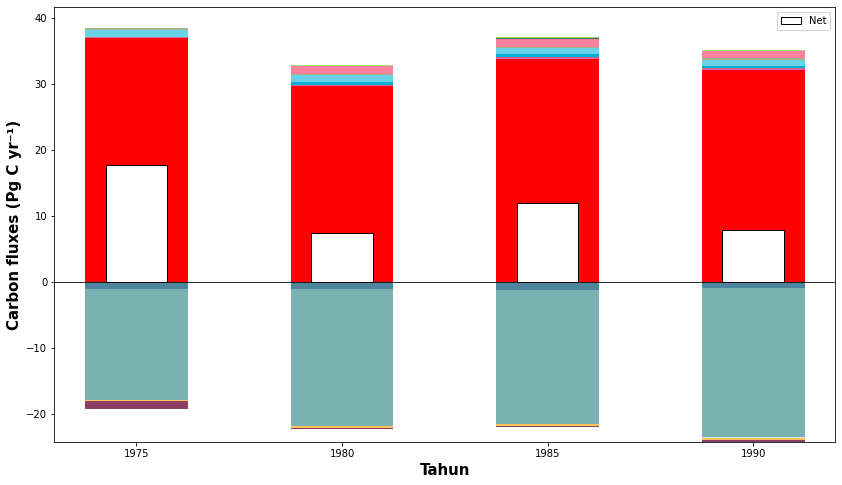

In [43]:
# Menggabungkan data sources, sinks, dan net menjadi satu DataFrame
data = np.hstack((sources, sinks))
columns = [
    'Agricultural Transition Emission', 'Forest Harvest', 'LUC Biofuel Emission', 'LUC Crops Emission', 
    'LUC Rangeland Emission', 'Land Abandonment Emission', 'Agricultural Transition Sequestration', 
    'Forest Growth Sequestration', 'LUC Biofuel Sequestration', 'LUC Crops Sequestration', 
    'LUC Rangeland Sequestration', 'Land Abandonment Sequestration'
]
df = pd.DataFrame(data, index=tahun, columns=columns)

df['GECH4AW'] = GECH4AW_frame
df['GECH4DF'] = GECH4DF_frame
df['GECH4RI'] = GECH4RI_frame
df['GECH4SB'] = GECH4SB_frame
df['GECO2AB'] = GECO2AB_frame
df['GECO2DF'] = GECO2DF_frame
df['GEN2ODF'] = GEN2ODF_frame
df['GEN2OFE'] = GEN2OFE_frame
df['GEN2OIF'] = GEN2OIF_frame
df['GEN2OLC'] = GEN2OLC_frame
df['GEN2ORE'] = GEN2ORE_frame
df['GEN2OSB'] = GEN2OSB_frame


# Membuat DataFrame untuk net
df_net = pd.DataFrame(net, index=tahun, columns=['Net'])

# Warna untuk grafik
colors = ['#FF0000','#FF0000','#FF0000','#FF0000','#FF0000','#FF0000',
          '#4D869C','#7AB2B2','#CDE8E5','#FC4100','#FFC55A','#8E3E63', 
          '#D2649A', '#03AED2', '#68D2E8', '#5F6F52','#A9B388','#FC819E',
          '#337357','#799351','#C6EBC5','#A1DD70','#A1DD70','#A1DD70']

# Membuat grafik batang vertikal yang ditumpuk untuk sources dan sinks
ax = df.plot(kind='bar', stacked=True, color=colors, figsize=(14, 8), legend=False)

# Menambahkan grafik batang untuk net di atas grafik batang yang ditumpuk
df_net.plot(kind='bar', color='white', ax=ax, position=0.5, width=0.3, edgecolor='black')

# Menambahkan detail ke grafik
plt.xlabel('Tahun', fontweight='bold', fontsize=15)
plt.ylabel('Carbon fluxes (Pg C yr⁻¹)', fontweight='bold', fontsize=15)
plt.xticks([r for r in range(len(tahun))], tahun, rotation=360)
plt.axhline(0, color='black', linewidth=0.8)

# Menambahkan legenda
handles, labels = ax.get_legend_handles_labels()

# Menampilkan grafik
plt.show()